In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from tensorflow.keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [25]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'

In [26]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [27]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [28]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [29]:
print(test)
print(test['image'])



                       image     label
0       test\angry\10052.jpg     angry
1       test\angry\10065.jpg     angry
2       test\angry\10079.jpg     angry
3       test\angry\10095.jpg     angry
4       test\angry\10121.jpg     angry
...                      ...       ...
7061  test\surprise\9806.jpg  surprise
7062  test\surprise\9830.jpg  surprise
7063  test\surprise\9853.jpg  surprise
7064  test\surprise\9878.jpg  surprise
7065   test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         test\angry\10052.jpg
1         test\angry\10065.jpg
2         test\angry\10079.jpg
3         test\angry\10095.jpg
4         test\angry\10121.jpg
                 ...          
7061    test\surprise\9806.jpg
7062    test\surprise\9830.jpg
7063    test\surprise\9853.jpg
7064    test\surprise\9878.jpg
7065     test\surprise\993.jpg
Name: image, Length: 7066, dtype: object


In [30]:
from tqdm.notebook import tqdm

In [31]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    print(features[0].shape)
    features = features.reshape(len(features),48,48,1)
    return features

In [32]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

(48, 48)


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\skbk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 102s 445ms/step - accuracy: 0.2351 - loss: 1.8412 - val_accuracy: 0.2583 - val_loss: 1.8169
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 97s 429ms/step - accuracy: 0.2453 - loss: 1.8170 - val_accuracy: 0.2598 - val_loss: 1.7945
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 95s 422ms/step - accuracy: 0.2495 - loss: 1.7854 - val_accuracy: 0.3150 - val_loss: 1.6807
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 95s 422ms/step - accuracy: 0.3064 - loss: 1.6998 - val_accuracy: 0.3671 - val_loss: 1.5622
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 97s 429ms/step - accuracy: 0.3717 - loss: 1.5945 - val_accuracy: 0.4486 - val_loss: 1.4271
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 97s 429ms/step - accuracy: 0.4082 - loss: 1.5034 - val_accuracy: 0.4737 - val_loss: 1.3660
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 98s 434ms/step - accuracy: 0.4409 - loss: 1.4502 - val_accuracy: 0.4969 - val_loss: 1.3180
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 102s 452ms/step - accuracy: 0.4514

In [35]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [3]:
import json
from tensorflow.keras.models import model_from_json



In [4]:

with open("emotiondetector.json", "r") as json_file:
    model_json = json_file.read()
    
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [5]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [6]:
def ef(image):
    img = load_img(image,grayscale =  True, target_size=(48,48))
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [7]:
image = 'angry.jpeg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\skbk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
model prediction is  angry


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model prediction is  sad


C:\Users\skbk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


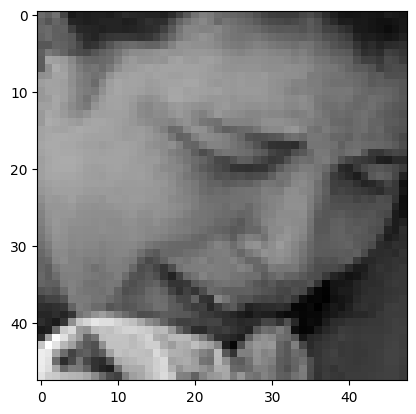

In [9]:
image = 'sad.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [10]:
import cv2
from keras.models import model_from_json
import numpy as np
# from keras_preprocessing.image import load_img
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

model.load_weights("emotiondetector.h5")
haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

webcam=cv2.VideoCapture(0)
labels = {0 : 'angry', 1 : 'disgust', 2 : 'fear', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprise'}
while True:
    i,im=webcam.read()
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(im,1.3,5)
    try: 
        for (p,q,r,s) in faces:
            image = gray[q:q+s,p:p+r]
            cv2.rectangle(im,(p,q),(p+r,q+s),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[pred.argmax()]
            # print("Predicted Output:", prediction_label)
            # cv2.putText(im,prediction_label)
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,0,255))
        cv2.imshow("Output",im)
        cv2.waitKey(27)
    except cv2.error:
        pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 